<a href="https://colab.research.google.com/github/jainam240101/Data-Science-Assignments/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Sci Eng Methods Assignment - Interpret your models.
 
1.   Fit a linear model and interpret the regression coefficients
2.   Fit a tree-based model and interpret the nodes
3.   Use auto ml to find the best model
4.   Run SHAP analysis on the models from steps 1, 2, and 3,interpret the SHAP values and compare them with the other model interpretability methods.

# Abstract

13 Attributes (12 Numeric Predictors, 1 Binary Class Attribute - No Demographics)

Numerous issues with any section of the intricate, interrelated network of spinal muscles, nerves, bones, discs, or tendons in the lumbar spine can result in lower back discomfort. The following are typical causes of low back pain:

*   The large nerve roots in the low back that go to the legs may be irritated
*   The smaller nerves that supply the low back may be irritated
*   The large paired lower back muscles (erector spinae) may be strained
*   The bones, ligaments or joints may be damaged
*   An intervertebral disc may be degenerating

Lower back pain, as well as pain that radiates or is referred to other parts of the body, can be brought on by an irritation or issue with any of these tissues. Back muscle spasms, which may not seem like much but can cause excruciating pain and incapacity, are a common side effect of lower back disorders. 

Although lower back pain is very prevalent, there is a wide range in its symptoms and intensity. Simple lower back muscle strains may be so painful as to require a trip to the ER, whereas a degenerating disc may only cause minor, sporadic discomfort.

Using information about the physical spine that has been gathered, this data set will determine whether a person is abnormal or normal.


The data set consists of :


* Column 1  : Pelvic_incidence
* Column 2  : Pelvic tilt
* Column 3  : Lumbar_lordosis_angle
* Column 4  : Sacral_slope
* Column 5  : Pelvic_radius
* Column 6  : Degree_spondylolisthesis
* Column 7  : Pelvic_slope
* Column 8  : Direct_tilt
* Column 9  : Thoracic_slope
* Column 10 : Cervical_tilt
* Column 11 : Sacrum_angle
* Column 12 : Scoliosis_slope



In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 8.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jainam240101/Data-Science-Assignments/main/Assignment%201/Dataset_spine.csv")

In [ ]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [ ]:
data.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [ ]:
data.corr()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
Col1,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
Col2,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
Col3,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
Col4,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
Col5,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
Col6,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
Col7,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Col8,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
Col9,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
Col10,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


# LOGISTIC REGRESSION

To fit a linear model to this dataset, we need to first encode the categorical variables using one-hot encoding or dummy variables. Once we have done that, we can use logistic regression to predict the probability of an individual having an income of over 50k based on the independent variables.

In [ ]:
one_hot_encoded = pd.get_dummies(data, columns=['Class_att'])
df_encoded = pd.concat([data, one_hot_encoded], axis=1)

# Remove the original column since it's no longer needed
df_encoded.drop('Class_att', axis=1, inplace=True)

print(df_encoded)
print(df_encoded.describe())

          Col1       Col2       Col3       Col4        Col5       Col6  \
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
..         ...        ...        ...        ...         ...        ...   
305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395   
306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010   
307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880   
308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750   
309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249   

         Col7     Col8     Col9     Col10  ...       Col6      Col7     Col8  \
0    0.744503  12.5661  14.5386

In [ ]:
df_treat = pd.get_dummies(data)
df_treat.dtypes.value_counts()
df_treat = df_treat.rename(columns=({'Class_att_Abnormal':'Abnormal','Class_att_Normal':'Normal'}))
df_treat.head(10)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Unnamed: 13_ Attribute8= Direct_tilt(numeric),Unnamed: 13_ Attribute9= thoracic_slope(numeric),"Unnamed: 13_Attribute class {Abnormal, Normal}",Unnamed: 13_Attribute1 = pelvic_incidence (numeric),Unnamed: 13_Attribute2 = pelvic_tilt (numeric),Unnamed: 13_Attribute3 = lumbar_lordosis_angle (numeric),Unnamed: 13_Attribute4 = sacral_slope (numeric),Unnamed: 13_Attribute5 = pelvic_radius (numeric),Unnamed: 13_Attribute6 = degree_spondylolisthesis (numeric),Unnamed: 13_Prediction is done by using binary classification.
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,...,0,0,0,0,0,0,0,0,0,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,...,0,0,0,0,0,0,0,0,0,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,...,0,0,0,0,0,0,0,0,0,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,...,0,0,0,0,0,0,0,0,0,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,...,0,0,0,0,0,0,0,0,0,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,...,0,0,0,1,0,0,0,0,0,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,...,0,0,0,0,1,0,0,0,0,0
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,...,0,0,0,0,0,1,0,0,0,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,...,0,0,0,0,0,0,1,0,0,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_treat

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Unnamed: 13_ Attribute8= Direct_tilt(numeric),Unnamed: 13_ Attribute9= thoracic_slope(numeric),"Unnamed: 13_Attribute class {Abnormal, Normal}",Unnamed: 13_Attribute1 = pelvic_incidence (numeric),Unnamed: 13_Attribute2 = pelvic_tilt (numeric),Unnamed: 13_Attribute3 = lumbar_lordosis_angle (numeric),Unnamed: 13_Attribute4 = sacral_slope (numeric),Unnamed: 13_Attribute5 = pelvic_radius (numeric),Unnamed: 13_Attribute6 = degree_spondylolisthesis (numeric),Unnamed: 13_Prediction is done by using binary classification.
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,...,0,0,0,0,0,0,0,0,0,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,...,0,0,0,0,0,0,0,0,0,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,...,0,0,0,0,0,0,0,0,0,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,...,0,0,0,0,0,0,0,0,0,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,...,0,0,0,0,0,0,0,0,0,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,...,0,0,0,0,0,0,0,0,0,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,...,0,0,0,0,0,0,0,0,0,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp= [df_treat['Abnormal'],df_treat['Normal']]
y= pd.DataFrame(temp)
y= y.transpose()
x = df_treat.drop(columns=['Abnormal','Normal'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [ ]:
model_LR.fit(x_train,y_train['Abnormal'])

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
y_prob = model_LR.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(x_test, y_pred)


from sklearn.model_selection import cross_val_score
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test['Abnormal'],y_pred)
confusion_matrix

array([[12,  6],
       [ 7, 37]])

ROC AUC SCORE

In [ ]:
auc_roc=metrics.roc_auc_score(y_test['Abnormal'],y_pred)
auc_roc

0.7537878787878788

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test['Abnormal'], y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9002525252525252

**Plotting the ROC curve in order to evaluate the classification**

Text(0.5, 0, 'False Positive Rate')

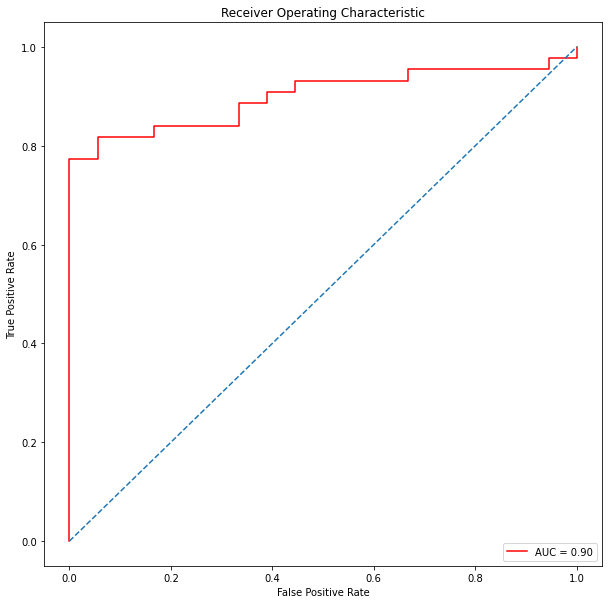

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
one_hot_encoded = pd.get_dummies(data, columns=['Class_att'])
df_encoded = pd.concat([data, one_hot_encoded], axis=1)

# Remove the original column since it's no longer needed
df_encoded.drop('Class_att', axis=1, inplace=True)

print(df_encoded)
print(df_encoded.describe())

          Col1       Col2       Col3       Col4        Col5       Col6  \
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
..         ...        ...        ...        ...         ...        ...   
305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395   
306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010   
307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880   
308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750   
309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249   

         Col7     Col8     Col9     Col10  ...       Col6      Col7     Col8  \
0    0.744503  12.5661  14.5386

In [ ]:
df_treat = pd.get_dummies(data)
df_treat.dtypes.value_counts()
df_treat = df_treat.rename(columns=({'Class_att_Abnormal':'Abnormal','Class_att_Normal':'Normal'}))
df_treat.head(10)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Unnamed: 13_ Attribute8= Direct_tilt(numeric),Unnamed: 13_ Attribute9= thoracic_slope(numeric),"Unnamed: 13_Attribute class {Abnormal, Normal}",Unnamed: 13_Attribute1 = pelvic_incidence (numeric),Unnamed: 13_Attribute2 = pelvic_tilt (numeric),Unnamed: 13_Attribute3 = lumbar_lordosis_angle (numeric),Unnamed: 13_Attribute4 = sacral_slope (numeric),Unnamed: 13_Attribute5 = pelvic_radius (numeric),Unnamed: 13_Attribute6 = degree_spondylolisthesis (numeric),Unnamed: 13_Prediction is done by using binary classification.
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,...,0,0,0,0,0,0,0,0,0,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,...,0,0,0,0,0,0,0,0,0,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,...,0,0,0,0,0,0,0,0,0,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,...,0,0,0,0,0,0,0,0,0,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,...,0,0,0,0,0,0,0,0,0,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,...,0,0,0,1,0,0,0,0,0,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,...,0,0,0,0,1,0,0,0,0,0
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,...,0,0,0,0,0,1,0,0,0,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,...,0,0,0,0,0,0,1,0,0,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**Creating scaler and new standardized train and test data frames.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_numeral = scaler.fit_transform(X_train.select_dtypes(['float', 'int64']))
X_train_s = pd.concat([pd.DataFrame(X_train_numeral, index=X_train.index, columns=X_train.columns[:12]), 
                       X_train.iloc[:, 12:]], axis=1)

X_test_numeral = scaler.transform(X_test.select_dtypes(['float', 'int64']))
X_test_s = pd.concat([pd.DataFrame(X_test_numeral, index=X_test.index, columns=X_test.columns[:12]),
                      X_test.iloc[:, 12:]], axis=1)

In [ ]:
# function responsible for fitting and predicting algorithms given through lists.
def algoritm_score_list(show_processing=False, standardized=False):
    scores_list = []

    for algorithm in algorithms:
        if show_processing:
            print('processing ' + str(algorithm) + ' algorithm...')

        if standardized:
            X_tn = X_train_s
            X_tt = X_test_s
        else:
            X_tn = X_train
            X_tt = X_test
            
        A = algorithm.fit(X_tn, y_train)
        y_predict = A.predict(X_tt)
        accuracy = accuracy_score(y_test,y_predict)

        scores_list.append([A, accuracy, standardized])
        
    print('all predictions finished')
    return scores_list

In [ ]:
from sklearn.tree import DecisionTreeClassifier
algorithms = [DecisionTreeClassifier()]

In [ ]:
default_alg = algoritm_score_list()

all predictions finished


In [ ]:
default_alg_s = algoritm_score_list(standardized=True)

all predictions finished


In [ ]:
df_alg = pd.DataFrame(default_alg, columns=['algorithm', 'accuracy', 'standardized'])
df_alg = pd.concat([df_alg, 
                    pd.DataFrame(default_alg_s, columns=['algorithm', 'accuracy', 'standardized'])], 
                   axis=0, 
                   ignore_index=True)
df_alg.sort_values(by='accuracy', ascending=False)

,algorithm,accuracy,standardized
1,DecisionTreeClassifier(),0.838710,True
0,DecisionTreeClassifier(),0.806452,False


As for DecisionTreeClassifier, unstandardized data doesn't influence accuracy.


# Tuning DecisionTree
While this is one of my first times using DecisionTreeClassifier and I'm not sure how to fix all parameters I will try to maximaize accuracy by changing max_depth and min_samples_leaf parameters. I will also check the accuracy of two criterion: gini and entropy.

In [ ]:
depth = default_alg[0][0].get_depth()

algorithms = []
for i in range(1, depth+1):
    algorithms.append(DecisionTreeClassifier(max_depth=i))
score_list = algoritm_score_list()

all predictions finished


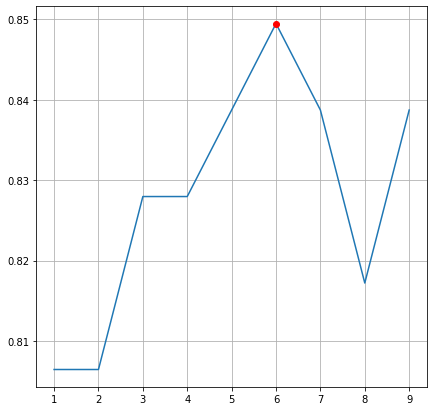

In [ ]:
scores = list(map(lambda a: a[1], score_list))
fig = plt.figure(figsize=(7, 7))
plt.grid()
sns.lineplot(x=range(1, depth+1), y=scores)
plt.plot(scores.index(max(scores)) + 1, max(scores), "or")

In [ ]:
print('The best algorithm: DecisionTreeClassifier(max_depth={}), its accuracy: {}'.format(scores.index(max(scores)) + 1, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(max_depth=6), its accuracy: 0.849


The graph shows that default min_samples_leaf overfitted the algorithm. A proper min_samples_leaf that increases accuracy should be bigger than 25 and smaller than 170 (it really depends on train and test spliting).


# max_depth and min_samples_leaf

In [ ]:
# min_samples_leaf in already created DT
default_alg[0][0].get_params()['min_samples_leaf']

1

In [ ]:
algorithms = []
for i in range(1, 202, 5):
    algorithms.append(DecisionTreeClassifier(min_samples_leaf=i))
score_list = algoritm_score_list()

all predictions finished


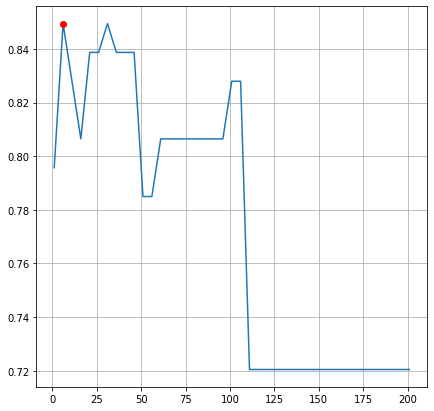

In [ ]:
scores = list(map(lambda a: a[1], score_list))
fig = plt.figure(figsize=(7, 7))
plt.grid()
sns.lineplot(x=range(1, 202, 5), y=scores)
plt.plot(scores.index(max(scores))*5 + 1, max(scores), "or")

In [ ]:
print('The best algorithm: DecisionTreeClassifier(min_samples_leaf={}), its accuracy: {}'.format(scores.index(max(scores))*5 + 1, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(min_samples_leaf=6), its accuracy: 0.849


In [ ]:
algorithms = []
for i in range(4, 30, 3):
    for j in range(45, 86, 5):
         algorithms.append(DecisionTreeClassifier(max_depth=i, min_samples_leaf=j))
score_list = algoritm_score_list() 

all predictions finished


In [ ]:
max_depth = list(map(lambda a: a[0].get_params()['max_depth'], score_list))
min_samples_leaf = list(map(lambda a: a[0].get_params()['min_samples_leaf'], score_list))
scores = list(map(lambda a: a[1], score_list))

df = pd.DataFrame(np.array([max_depth, min_samples_leaf, scores]).T, 
                  columns=['max_depth', 'min_s_l', 'scores'])

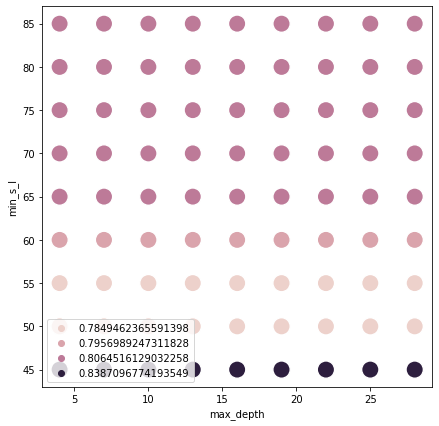

In [ ]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=df['max_depth'], y=df['min_s_l'], hue=df['scores'], s=300)
plt.legend(loc='lower left')

In [ ]:
best = scores.index(max(scores))
m_d = max_depth[best]
m_s_l = min_samples_leaf[best]
print('The best algorithm: DecisionTreeClassifier(max_depth={}, min_samples_leaf={}), its accuracy: {}'.format(m_d, m_s_l, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(max_depth=4, min_samples_leaf=45), its accuracy: 0.839


## Criterion

In [ ]:
algorithms = [DecisionTreeClassifier(criterion='gini'), DecisionTreeClassifier(criterion='entropy')]
score_list = algoritm_score_list()   
print('criterion: gini, score: {}.'.format(str(round(score_list[0][1], 3))))
print('criterion: entropy, score: {}.'.format(str(round(score_list[1][1], 3))))

all predictions finished
criterion: gini, score: 0.839.
criterion: entropy, score: 0.849.


My criterion comparison showed that there is no huge difference between gini and entropy in this particular dataset. Consequently, I use the default criterion: gini.

# Algorithms comparison

In [ ]:
algorithms = [DecisionTreeClassifier(criterion='gini', max_depth=9), 
              DecisionTreeClassifier(criterion='gini', min_samples_leaf=66), 
              DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=65)]
df_DT = pd.DataFrame(algoritm_score_list(), columns=['algorithm', 'accuracy', 'standardized'])
df_DT

all predictions finished


,algorithm,accuracy,standardized
0,DecisionTreeClassifier(max_depth=9),0.849462,False
1,DecisionTreeClassifier(min_samples_leaf=66),0.806452,False
2,"DecisionTreeClassifier(max_depth=16, min_sampl...",0.806452,False


DecisionTree and LogisticRegression with fixed parameters have the highest accuracy. Moreover, DecisionTree doesn't need standardized numeric data to work properly. As for DecisionTree, adding parameters increased accuracy by 3,5% in case of LogisticRegression this increase was much smaller. KNeighborsClassifier accuracy is smaller than the rest of algorithms.

In [ ]:
final_list = algoritm_score_list()
final_df = pd.DataFrame(final_list, columns=['algorithm', 'accuracy', 'standardized'])
final_df.head(12).sort_values(by='accuracy', ascending=False)

all predictions finished


,algorithm,accuracy,standardized
0,DecisionTreeClassifier(max_depth=9),0.827957,False
1,DecisionTreeClassifier(min_samples_leaf=66),0.806452,False
2,"DecisionTreeClassifier(max_depth=16, min_sampl...",0.806452,False


# AUTO ML - USING h20

In [ ]:
!pip3 install h2o
import h2o
h2o.init()
h20df = h2o.import_file("https://raw.githubusercontent.com/jainam240101/Data-Science-Assignments/main/Assignment%201/Dataset_spine.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=e3e5ffc95f89bfe4f2130146ce18712ec2c878f4c72695dd993cbd097e1f9d27
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpx0d80dfo
  JVM stdout: /tmp/tmp

H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_6fh2yo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h20df.describe(chunk_summary=True)

Rows:310
Cols:14

Chunk compression summary: 
chunk_type    chunk_name        count    count_percentage    size     size_percentage
------------  ----------------  -------  ------------------  -------  -----------------
CBS           Binary            1        7.14286             109  B   0.432522
C4S           4-Byte Fractions  6        42.8571             7.8 KB   31.5226
CStr          Strings           1        7.14286             1.8 KB   7.38066
C8D           64-bit Reals      6        42.8571             14.9 KB  60.6643

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  24.6 KB  310               1                              14
mean             24.6 KB  310               1                              14
min              24.6 KB  310               1                              14
max              24.6 KB  310               1                              14
stddev           0  B     0                 0                              0
total            24.6 KB  310               1                              14

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,C14
type,real,real,real,real,real,real,real,real,real,real,real,real,enum,string
mins,26.14792141,-6.554948347,14.0,13.3669307,70.08257486,-11.05817866,0.003220264,7.027,7.0378,7.0306,-35.287375,7.0079,,NaN
mean,60.496652929516145,17.54282196797096,51.93092960345161,42.95383096141935,117.92065502380645,26.296694437867743,0.4729792534451614,21.32152612903226,13.064511290322582,11.93331674193548,-14.053139487096768,25.645980645161277,,NaN
maxs,129.8340406,49.4318636,125.7423855,121.4295656,163.0710405,418.5430821,0.998826684,36.7439,19.324,16.82108,6.972071,44.3412,,NaN
sigma,17.236520321708866,10.008330258206355,18.55406396276117,13.423102164839573,13.31737704490458,37.55902655487235,0.28578674082869,8.639423372673226,3.399712849977083,2.893265303802673,12.225582016950822,10.450558176100039,,NaN
zeros,0,0,0,0,0,0,0,0,0,0,0,0,,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,296
0,63.0278175,22.55258597,39.60911701,40.47523153,98.67291675,-0.254399986,0.744503464,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,
1,39.05695098,10.06099147,25.01537822,28.99595951,114.4054254,4.564258645,0.415185678,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,
2,68.83202098,22.21848205,50.09219357,46.61353893,105.9851355,-3.530317314,0.474889164,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classification.


In [ ]:
h20df.head()

Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,C14
63.0278,22.5526,39.6091,40.4752,98.6729,-0.2544,0.744503,12.5661,14.5386,15.3047,-28.6585,43.5123,Abnormal,
39.057,10.061,25.0154,28.996,114.405,4.56426,0.415186,12.8874,17.5323,16.7849,-25.5306,16.1102,Abnormal,
68.832,22.2185,50.0922,46.6135,105.985,-3.53032,0.474889,26.8343,17.4861,16.659,-29.0319,19.2221,Abnormal,Prediction is done by using binary classification.
69.297,24.6529,44.3112,44.6441,101.868,11.2115,0.369345,23.5603,12.7074,11.4245,-30.4702,18.8329,Abnormal,
49.7129,9.65207,28.3174,40.0608,108.169,7.9185,0.54336,35.494,15.9546,8.87237,-16.3784,24.9171,Abnormal,
40.2502,13.9219,25.1249,26.3283,130.328,2.23065,0.789993,29.323,12.0036,10.4046,-1.51221,9.6548,Abnormal,Attribute1 = pelvic_incidence (numeric)
53.4329,15.8643,37.1659,37.5686,120.568,5.98855,0.19892,13.8514,10.7146,11.3783,-20.5104,25.9477,Abnormal,Attribute2 = pelvic_tilt (numeric)
45.3668,10.7556,29.0383,34.6111,117.27,-10.6759,0.131973,28.8165,7.7676,7.60961,-25.1115,26.3543,Abnormal,Attribute3 = lumbar_lordosis_angle (numeric)
43.7902,13.5338,42.6908,30.2564,125.003,13.289,0.190408,22.7085,11.4234,10.5919,-20.0201,40.0276,Abnormal,Attribute4 = sacral_slope (numeric)
36.6864,5.01088,41.9488,31.6755,84.2414,0.664437,0.3677,26.2011,8.738,14.9142,-1.7021,21.432,Abnormal,Attribute5 = pelvic_radius (numeric)


In [ ]:
train, test = h20df.split_frame(ratios=[0.8], seed = 1)

In [ ]:
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()
drift_data["is_train"].table()

is_train,Count
0,61
1,249


In [ ]:
x = list(set(train.col_names) - set(["Class_att"]))

In [ ]:
def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()

In [ ]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

In [ ]:
aml.train(training_frame = train, y = 'Class_att')

AutoML progress: |
18:12:56.544: _train param, Dropping bad and constant columns: [C14, is_train]

█
18:13:01.137: _train param, Dropping bad and constant columns: [C14, is_train]


18:13:02.148: _train param, Dropping bad and constant columns: [C14, is_train]
18:13:02.196: GBM_1_AutoML_1_20230324_181256 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20230324_181256.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 199.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 199.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 199.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have 

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20230324_181256


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       0/1
# GLM base models (used / total)           1/1
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0381630391483059
RMSE: 0.19535362588983574
LogLoss: 0.14305741492272991
AUC: 0.993436293

In [ ]:
import matplotlib.pyplot as plt
# Get the leaderboard with the performance of each base model
leaderboard = aml.leaderboard
print(leaderboard)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20230324_181256  0.92417    0.316628  0.843359                0.144208  0.317322  0.100693
GLM_1_AutoML_1_20230324_181256                           0.922471   0.318875  0.81037                 0.158494  0.31903   0.10178
GBM_grid_1_AutoML_1_20230324_181256_model_2              0.917375   0.345314  0.839473                0.155869  0.328047  0.107615
StackedEnsemble_AllModels_1_AutoML_1_20230324_181256     0.91583    0.330781  0.819138                0.144981  0.326573  0.10665
GBM_4_AutoML_1_20230324_181256                           0.905097   0.360012  0.824937                0.167297  0.336632  0.113321
XGBoost_grid_1_AutoML_1_20230324_181256_model_1          0.90471    0.35323   0.823872                0.165753  0.333309  0.111095
XGBoost_grid_1_AutoML_1_20230324_181256_model_5          0.903938   0.371892  0.82528

In [ ]:
leaderboard = aml.leaderboard.as_data_frame()
# Get ensemble performance
ensemble_perf = aml.leader.model_performance(test_data=test)

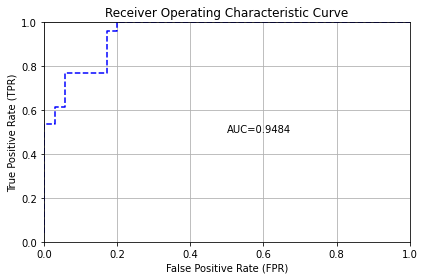

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.02857142857142857,
  0.02857142857142857,
  0.02857142857142857,
  0.05714285714285714,
  0.05714285714285714,
  0.05714285714285714,
  0.05714285714285714,
  0.05714285714285714,
  0.08571428571428572,
  0.11428571428571428,
  0.14285714285714285,
  0.17142857142857143,
  0.17142857142857143,
  0.17142857142857143,
  0.17142857142857143,
  0.17142857142857143,
  0.17142857142857143,
  0.2,
  0.2,
  0.22857142857142856,
  0.2571428571428571,
  0.2857142857142857,
  0.3142857142857143,
  0.34285714285714286,
  0.37142857142857144,
  0.4,
  0.42857142857142855,
  0.45714285714285713,
  0.4857142857142857,
  0.5142857142857142,
  0.5428571428571428,
  0.5714285714285714,
  0.6,
  0.6285714285714286,
  0.6571428571428571,
  0.6857142857142857,
  0.7142857142857143,
  0.7428571428571429,
  0.7714285714285715,
  0.8,
  0.8285714285714286,
  0.8571428571428571,
  0.8857142857142857,
  0.91428

In [ ]:
# Plot ensemble performance
ensemble_perf.plot()

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230324_181256

,Abnormal,Normal,Error,Rate
Abnormal,172.0,3.0,0.0171,(3.0/175.0)
Normal,6.0,68.0,0.0811,(6.0/74.0)
Total,178.0,71.0,0.0361,(9.0/249.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

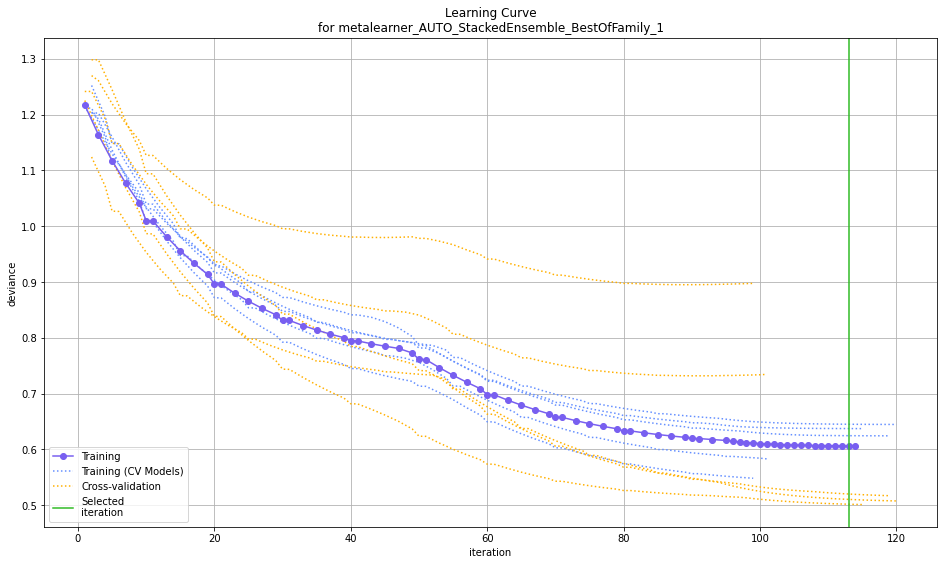

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

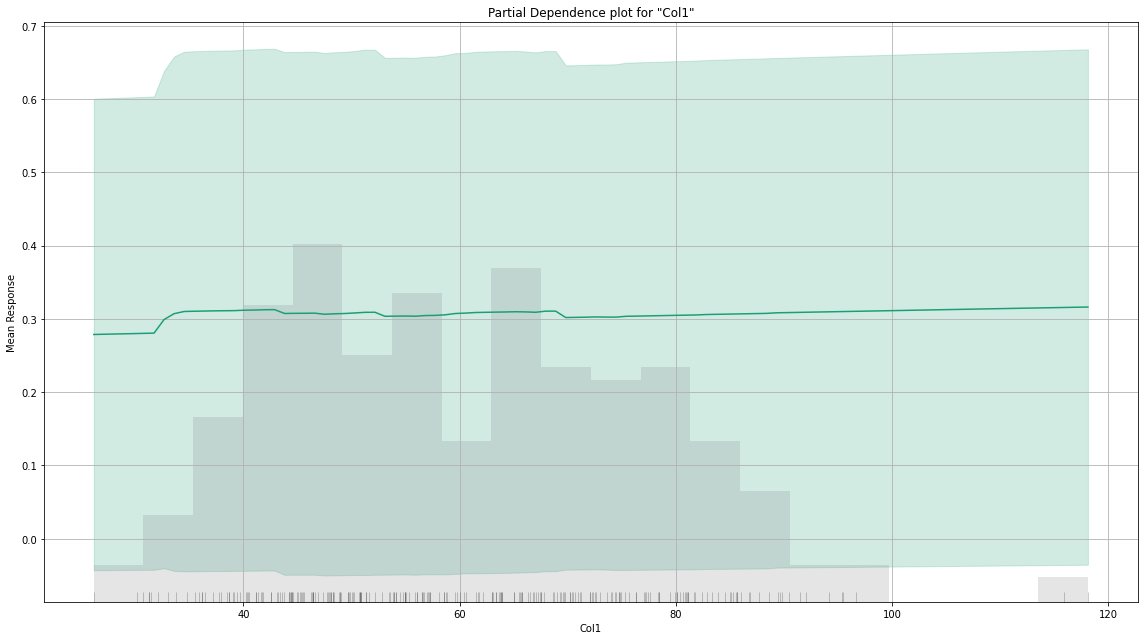

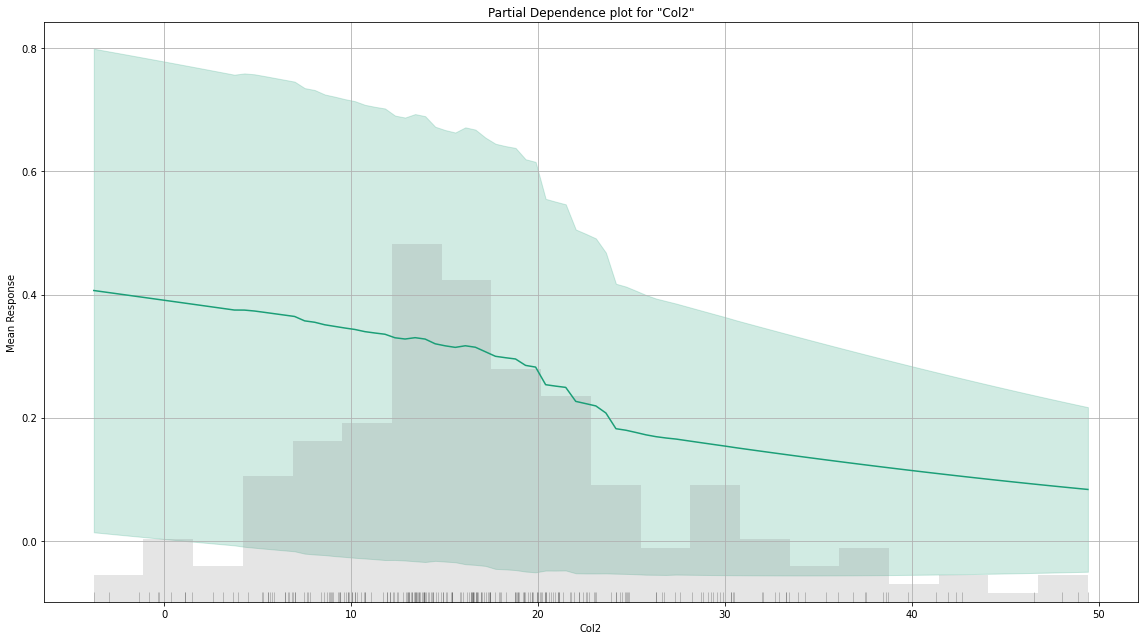

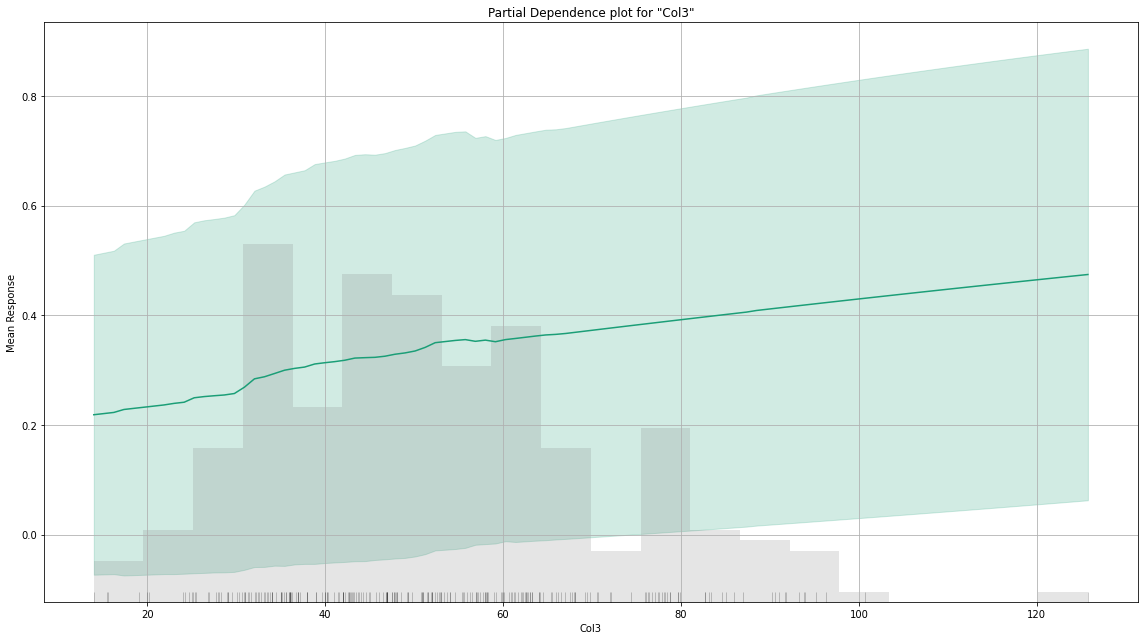

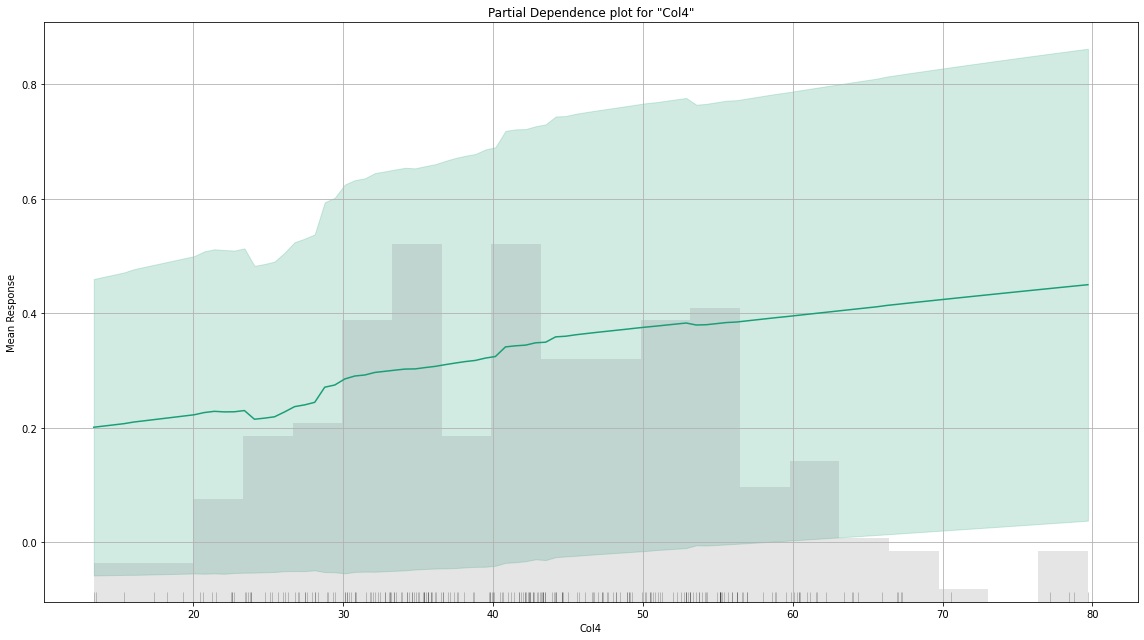

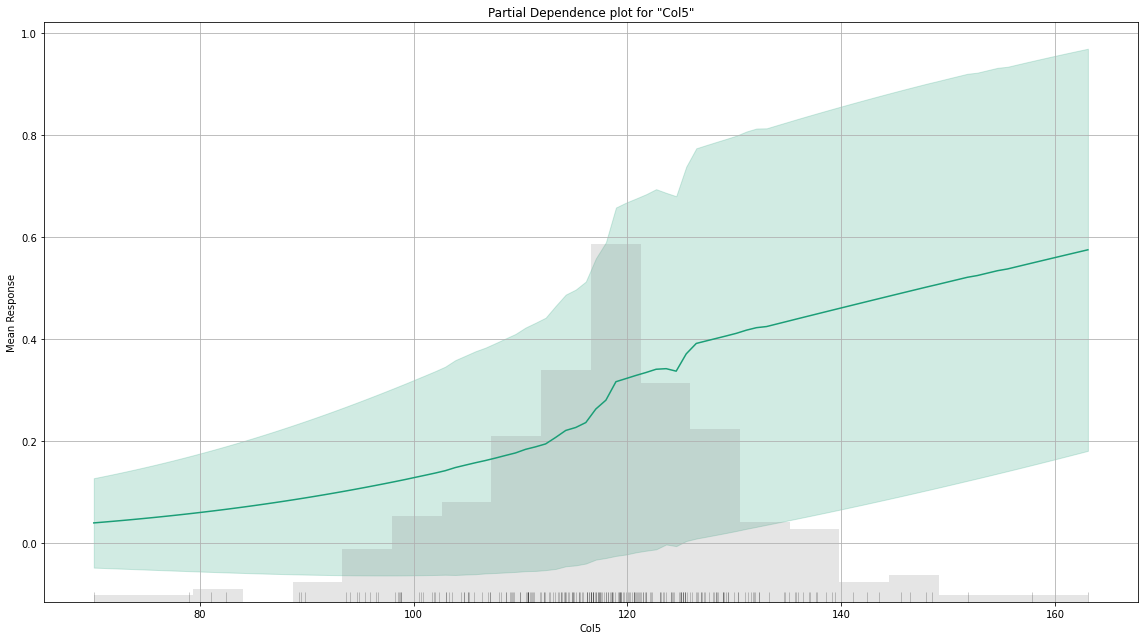

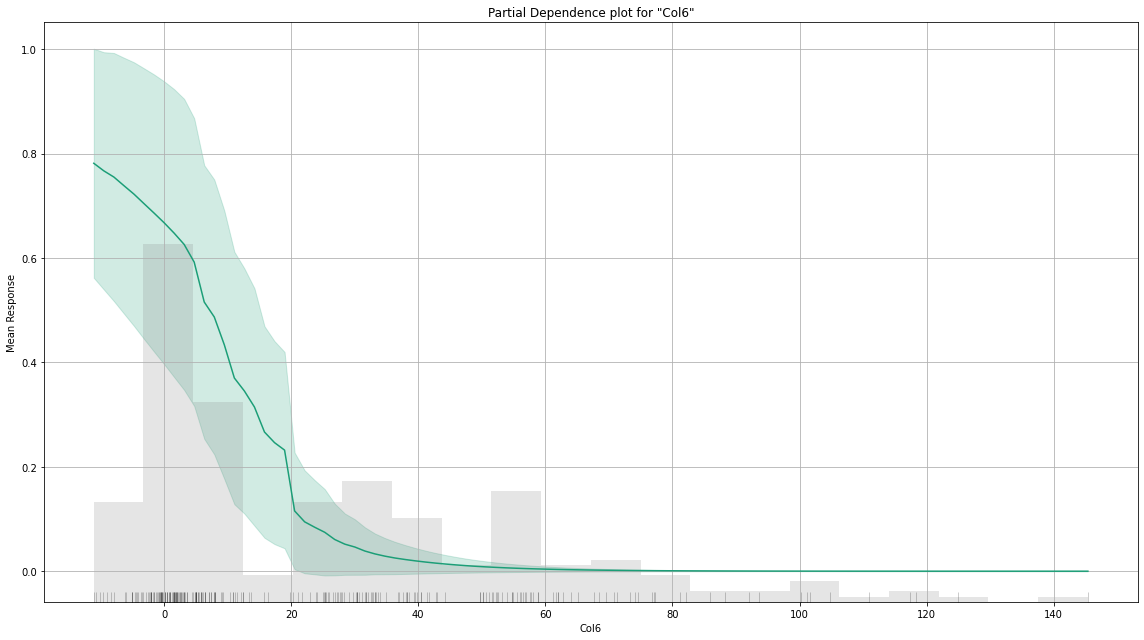

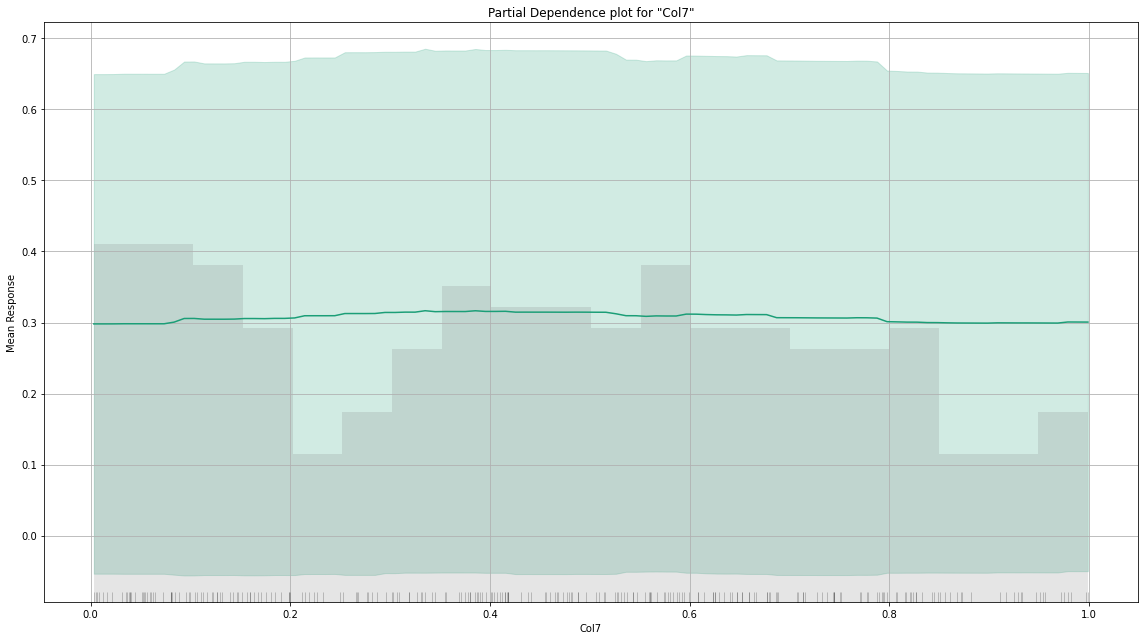

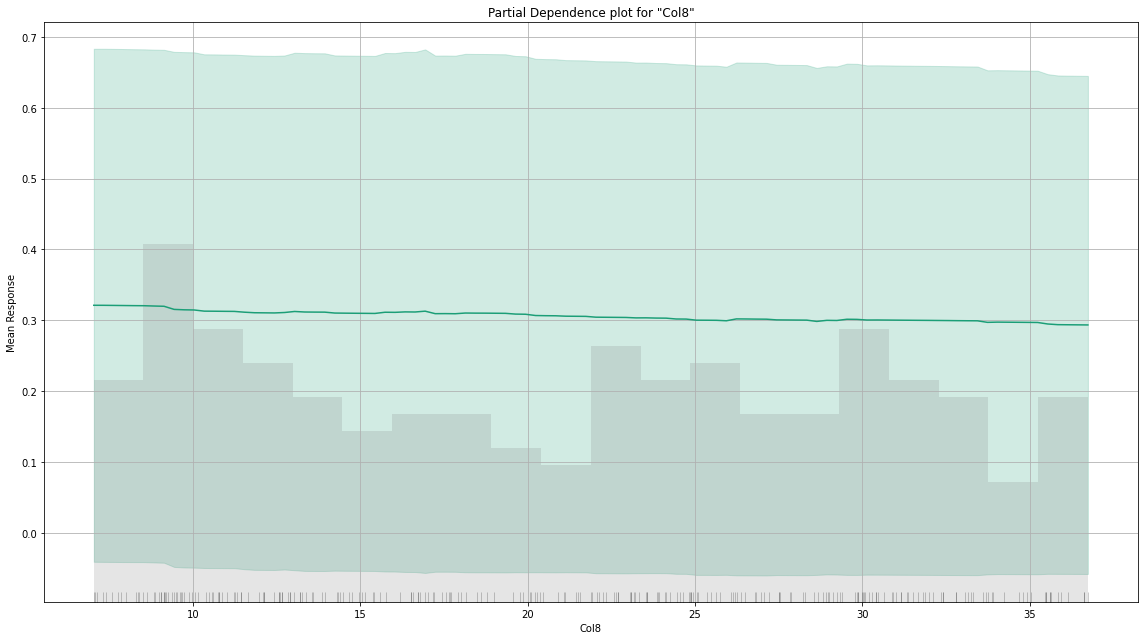

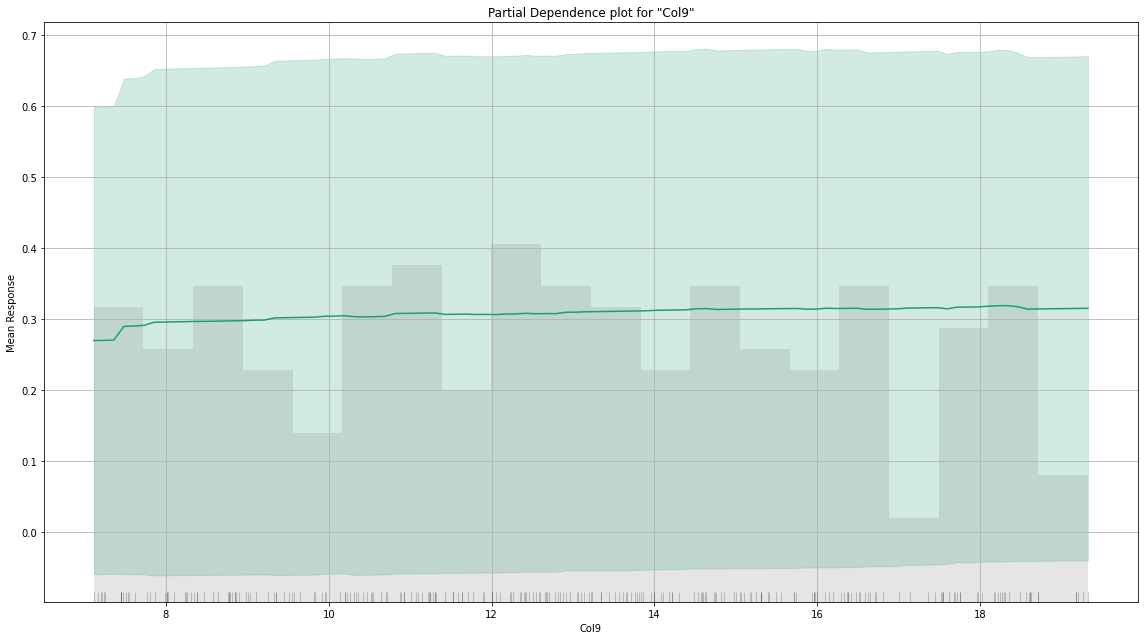

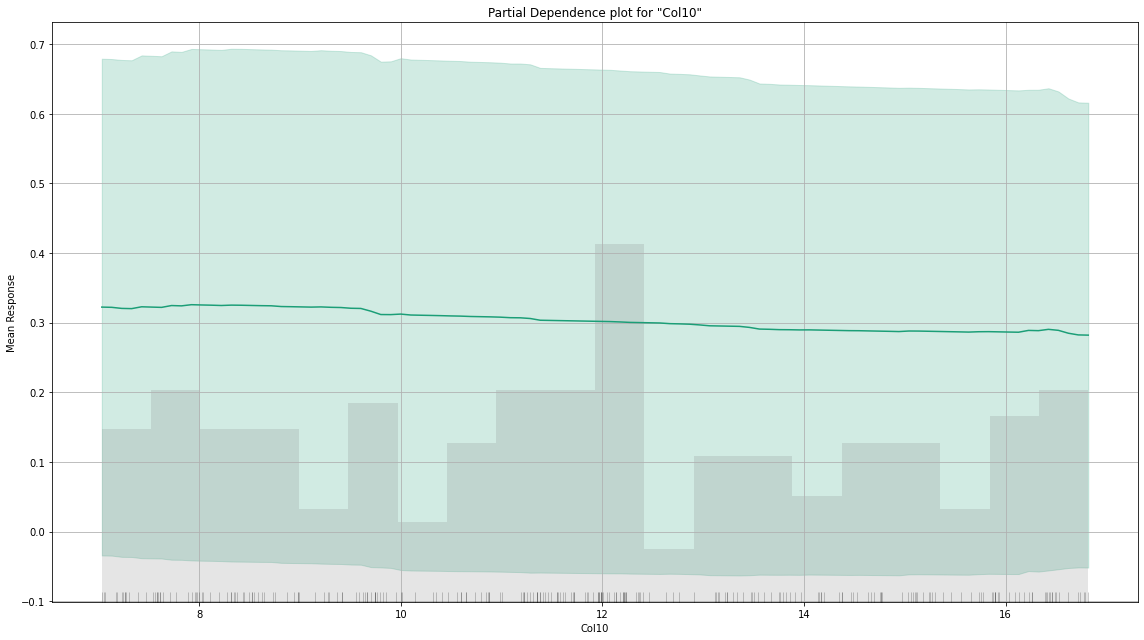

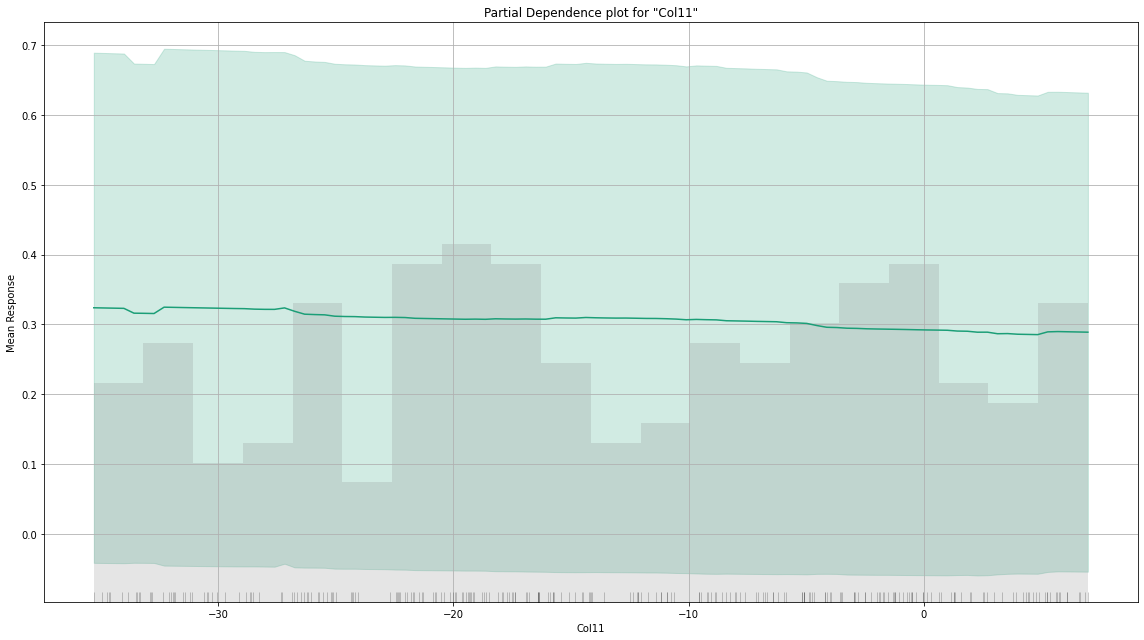

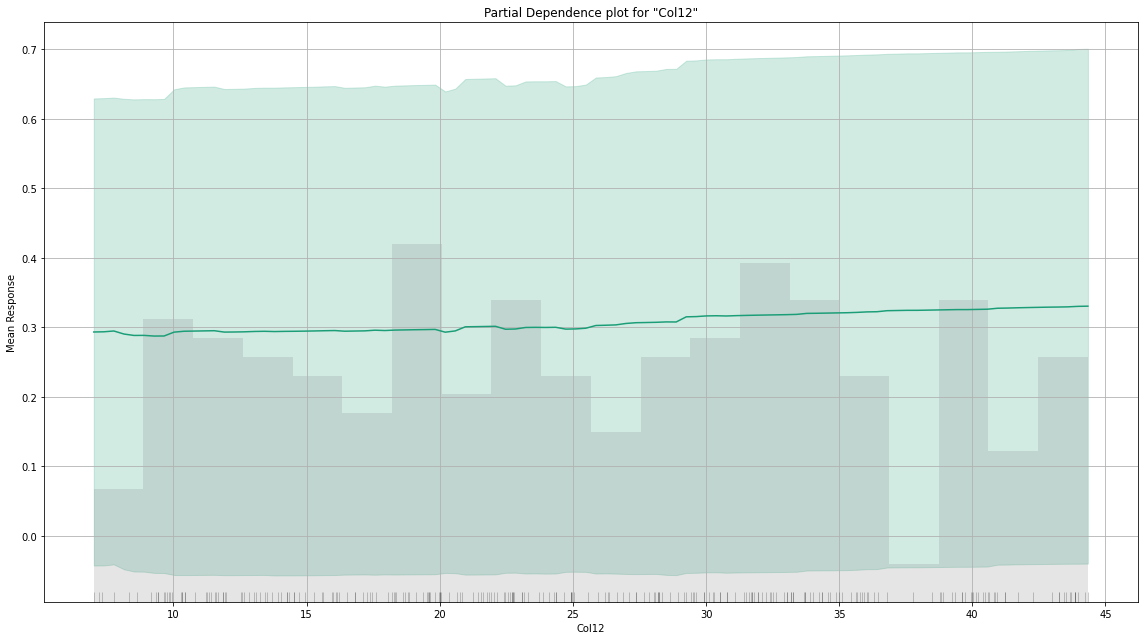

In [ ]:
fi = aml.leader.explain(train)

The model uses 11 base models, including 4 GBM, 5 XGBoost, and 2 DeepLearning models. The metalearner algorithm used is GLM, with a stacking strategy of cross-validation. The model was trained on a binary classification problem and evaluated using the following metrics on the training data:

* Mean Squared Error (MSE): 0.0381630391483059
* Root Mean Squared Error (RMSE): 0.19535362588983574
* Log Loss: 0.14305741492272991
* Area Under Curve (AUC): 0.9934362934362935
* Area Under Precision-Recall Curve (AUCPR): 0.9865806133919375
* Gini: 0.9868725868725869

The confusion matrix shows the performance of the model at the optimal threshold (0.3843523015206794) for the F1 score, which is the highest F1 score obtained by the model. At this threshold, the model has an error rate of 10.42%, with 624 false positives and 420 false negatives. The maximum metrics at their respective thresholds are also shown, including the maximum F1 score, F2 score, F0.5 score, accuracy, precision, recall, specificity, absolute MCC, min per-class accuracy, and mean per-class accuracy.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

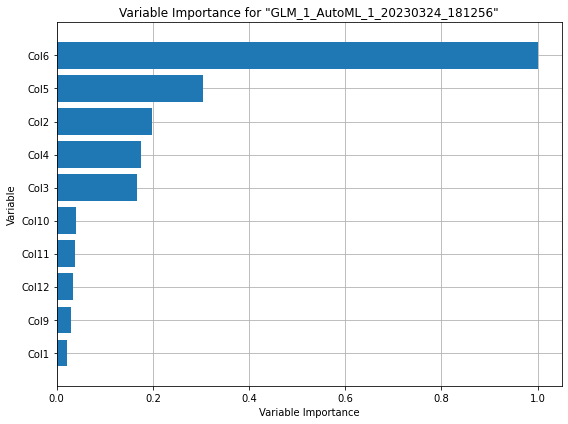

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

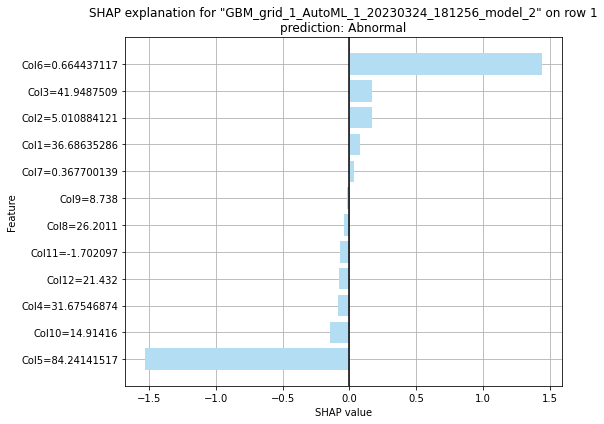

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(frame = test, row_index = 1, figsize = (8,6), exclude_explanations = "leaderboard")

# SHAP Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jainam240101/Data-Science-Assignments/main/Assignment%201/Dataset_spine.csv")
one_hot_encoded = pd.get_dummies(data, columns=['Class_att'])
df_encoded = pd.concat([data, one_hot_encoded], axis=1)

# Remove the original column since it's no longer needed
df_encoded.drop('Class_att', axis=1, inplace=True)

df_treat = pd.get_dummies(data)
df_treat.dtypes.value_counts()
df_treat = df_treat.rename(columns=({'Class_att_Abnormal':'Abnormal','Class_att_Normal':'Normal'}))
df_treat.head(10)

temp= [df_treat['Abnormal'],df_treat['Normal']]
y= pd.DataFrame(temp)
y= y.transpose()
x = df_treat.drop(columns=['Abnormal','Normal'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)

In [ ]:
print(x, y)

          Col1       Col2       Col3       Col4        Col5       Col6  \
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
..         ...        ...        ...        ...         ...        ...   
305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395   
306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010   
307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880   
308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750   
309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249   

         Col7     Col8     Col9     Col10  ...  \
0    0.744503  12.5661  14.5386  15.30468  ...   
1    0.4151

In [ ]:
catagorical_features = []
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)
reg = sm.OLS(y_train, preprocessed_X_train).fit()

In [ ]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add') 
    y_pred = reg.predict(X)
    return mean_absolute_error(y, y_pred)

In [ ]:
train_mae = evaluate(X_train, y_train, mapper, reg, True)
test_mae = evaluate(X_test, y_test, mapper, reg, True)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 0.29, test MAE = 0.519 


In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

train_mae = evaluate(X_train, y_train, reg=pipeline)
test_mae = evaluate(X_test, y_test, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 0.073, test MAE = 0.405 


In [ ]:
print(reg)
# sorted_idx = reg.feature_importances_.argsort()
# features = numerical_features + catagorical_features 
# result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
# plt.barh([x[0] for x in result], [x[1] for x in result])

RandomForestRegressor()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False) #revert
catagorical_features = []
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

In [ ]:
nan_frame = pd.DataFrame(columns=catagorical_features+numerical_features, index=[0])
nan_frame

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Unnamed: 13_ Attribute8= Direct_tilt(numeric),Unnamed: 13_ Attribute9= thoracic_slope(numeric),"Unnamed: 13_Attribute class {Abnormal, Normal}",Unnamed: 13_Attribute1 = pelvic_incidence (numeric),Unnamed: 13_Attribute2 = pelvic_tilt (numeric),Unnamed: 13_Attribute3 = lumbar_lordosis_angle (numeric),Unnamed: 13_Attribute4 = sacral_slope (numeric),Unnamed: 13_Attribute5 = pelvic_radius (numeric),Unnamed: 13_Attribute6 = degree_spondylolisthesis (numeric),Unnamed: 13_Prediction is done by using binary classification.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_test.iloc[0: 1]

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Unnamed: 13_ Attribute8= Direct_tilt(numeric),Unnamed: 13_ Attribute9= thoracic_slope(numeric),"Unnamed: 13_Attribute class {Abnormal, Normal}",Unnamed: 13_Attribute1 = pelvic_incidence (numeric),Unnamed: 13_Attribute2 = pelvic_tilt (numeric),Unnamed: 13_Attribute3 = lumbar_lordosis_angle (numeric),Unnamed: 13_Attribute4 = sacral_slope (numeric),Unnamed: 13_Attribute5 = pelvic_radius (numeric),Unnamed: 13_Attribute6 = degree_spondylolisthesis (numeric),Unnamed: 13_Prediction is done by using binary classification.
279,48.801909,18.017762,52.0,30.784147,139.150407,10.442862,0.105014,26.1245,19.2659,8.31303,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

Permutation explainer: 32it [00:24,  1.13s/it]


In [ ]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

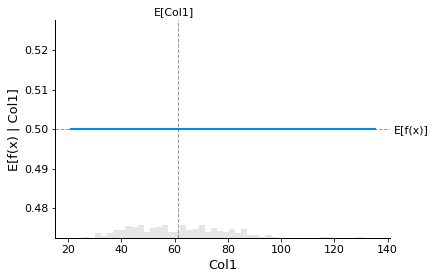

In [ ]:
partial_dependence_plot('Col1')

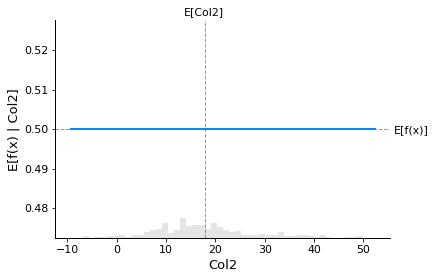

In [ ]:
partial_dependence_plot('Col2')

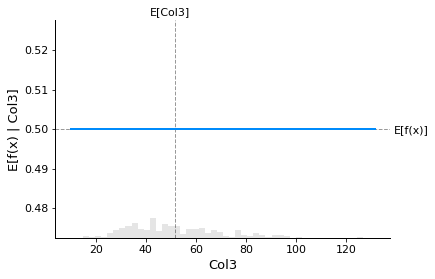

In [ ]:
partial_dependence_plot('Col3')

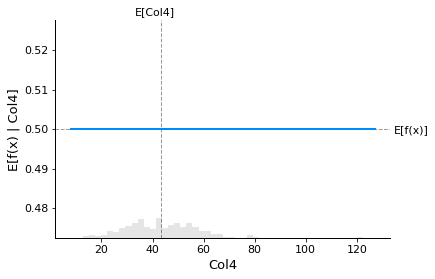

In [ ]:
partial_dependence_plot('Col4')

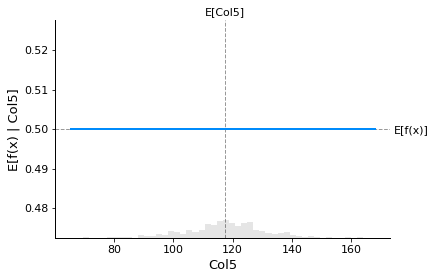

In [ ]:
partial_dependence_plot('Col5')

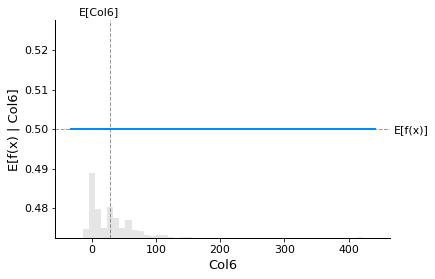

In [ ]:
partial_dependence_plot('Col6')

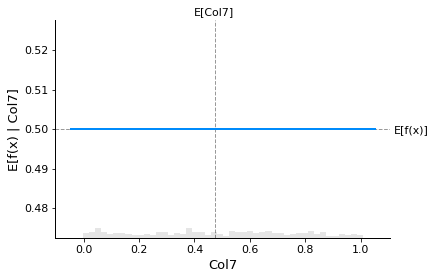

In [ ]:
partial_dependence_plot('Col7')

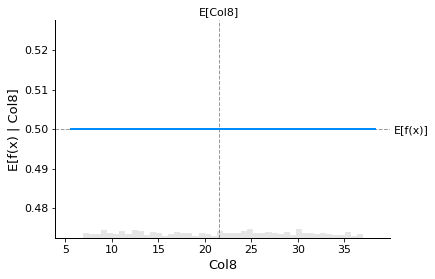

In [119]:
partial_dependence_plot('Col8')

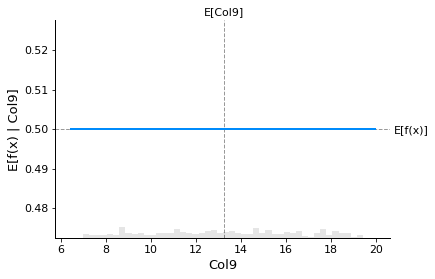

In [120]:
partial_dependence_plot('Col9')

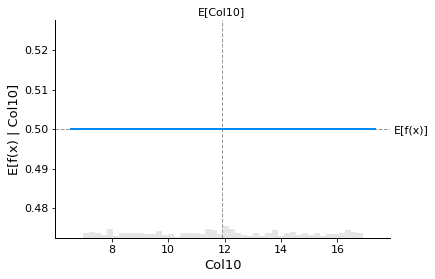

In [121]:
partial_dependence_plot('Col10')

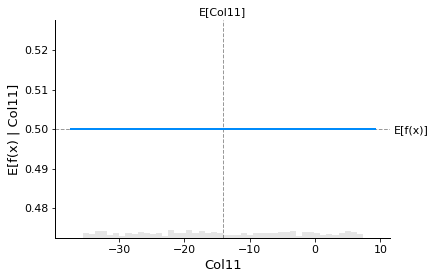

In [122]:
partial_dependence_plot('Col11')

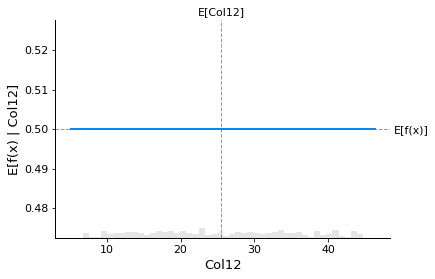

In [ ]:
partial_dependence_plot('Col12')

# Regression with scikit-learn

This uses the model-agnostic KernelExplainer and the TreeExplainer to explain several different regression models trained on a small diabetes dataset. This notebook is meant to give examples of how to use KernelExplainer for various models.

**Load Data**

In [118]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time

data = pd.read_csv("https://raw.githubusercontent.com/jainam240101/Data-Science-Assignments/main/Assignment%201/Dataset_spine.csv")

one_hot_encoded = pd.get_dummies(data, columns=['Class_att'])
df_encoded = pd.concat([data, one_hot_encoded], axis=1)

# Remove the original column since it's no longer needed
df_encoded.drop('Class_att', axis=1, inplace=True)

df_treat = pd.get_dummies(data)
df_treat.dtypes.value_counts()
df_treat = df_treat.rename(columns=({'Class_att_Abnormal':'Abnormal','Class_att_Normal':'Normal'}))
df_treat.head(10)

temp= [df_treat['Abnormal'],df_treat['Normal']]

y= pd.DataFrame(temp)
y= y.transpose()
x = df_treat.drop(columns=['Abnormal','Normal'])

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


**Linear regression**

In [ ]:
from sklearn import linear_model
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

print_accuracy(lin_regr.predict)

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


Root mean squared test error = Abnormal    0.404347
Normal      0.404347
dtype: float64


**Explain a single prediction from the test set**

In [ ]:
shap.initjs()
ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value[0], shap_values[0])

X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


**Explain all the predictions in the test set**

  0%|          | 0/62 [00:00<?, ?it/s]

X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature na

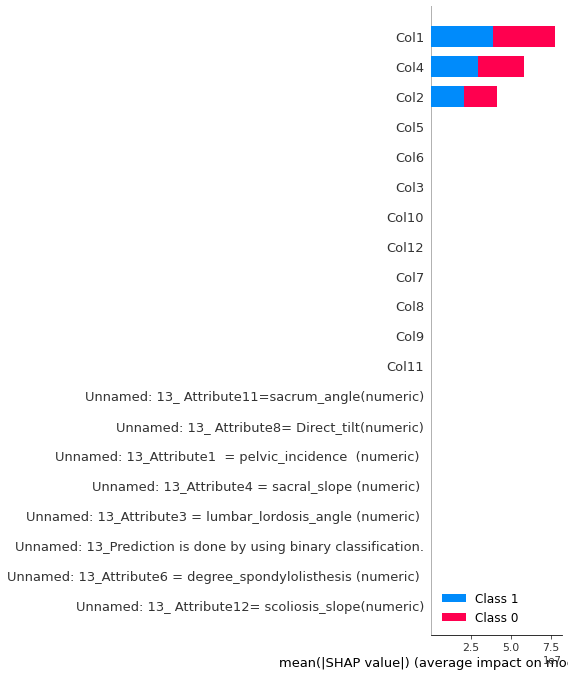

In [ ]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

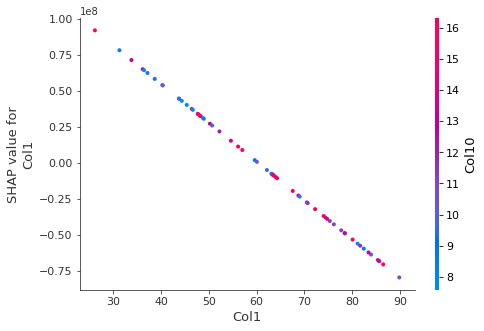

In [ ]:
shap.dependence_plot("Col1", shap_values[0], X_test)

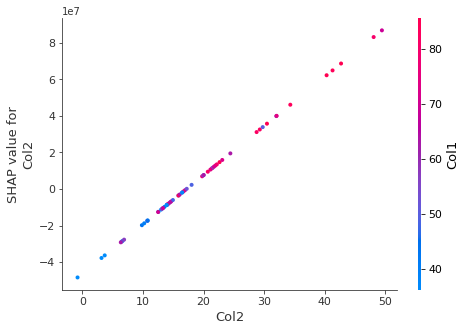

In [ ]:
shap.dependence_plot("Col2", shap_values[0], X_test)

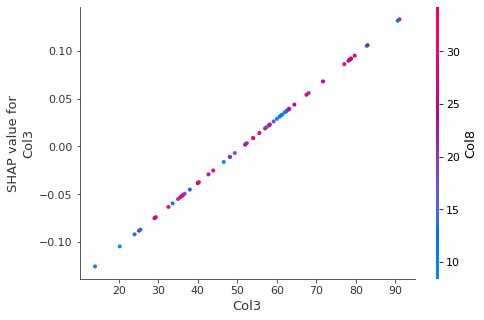

In [ ]:
shap.dependence_plot("Col3", shap_values[0], X_test)

In [ ]:
shap.initjs()
shap.force_plot(ex.expected_value[0], shap_values[0])

# **Decision tree regressor**

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


Root mean squared test error = Abnormal    0.420212
Normal      0.420212
dtype: float64


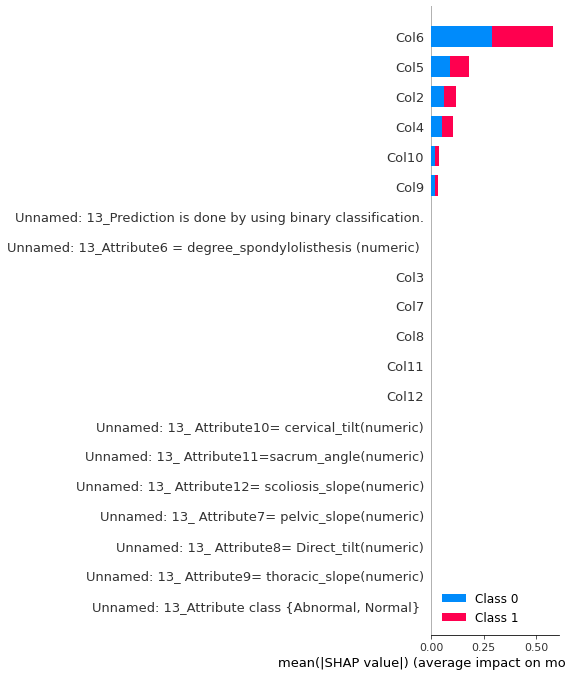

In [ ]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

# explain all the predictions in the test set
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

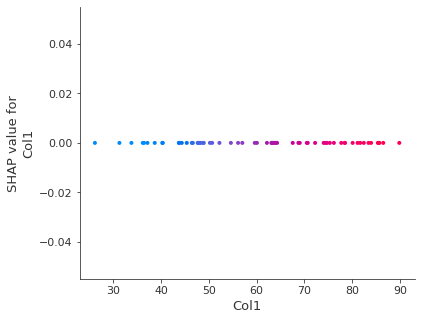

In [ ]:
shap.dependence_plot("Col1", shap_values[0],X_test)

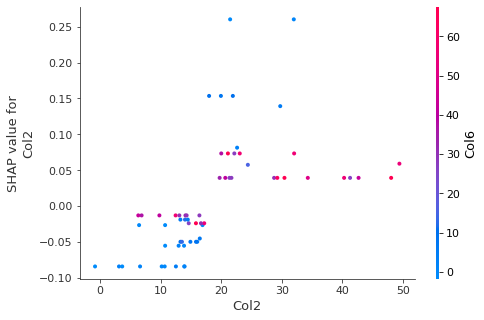

In [ ]:
shap.dependence_plot("Col2", shap_values[0],X_test)

In [ ]:
shap.initjs()
shap.force_plot(ex.expected_value[0], shap_values[0])

# Random forest

Using the fast TreeExplainer implementation.

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


Root mean squared test error = Abnormal    0.38013
Normal      0.38013
dtype: float64


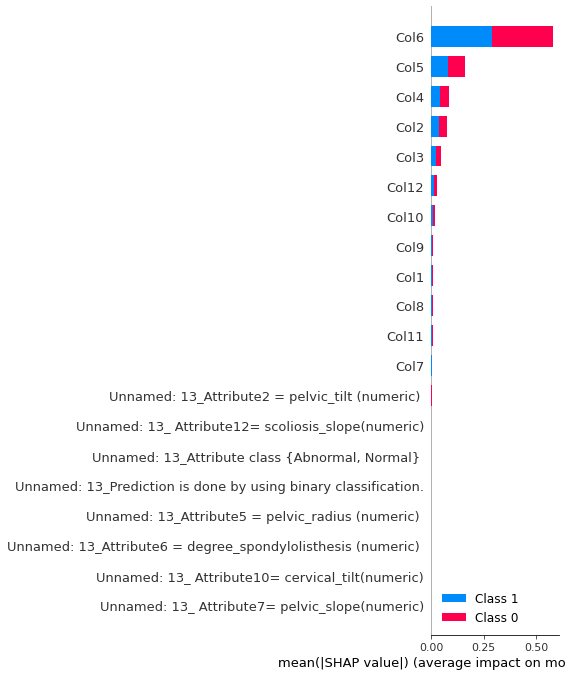

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

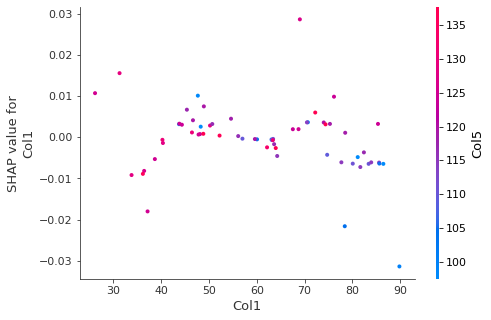

In [ ]:
shap.dependence_plot("Col1", shap_values[0], X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0])

## License 

MIT License

Copyright (c) 2023 Jainam Mehta

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## References

1. H20.ai- https://docs.h2o.ai/
2. OLS Model- http://net-informations.com/ds/mla/ols.html
3. Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/
4. Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
5. Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression
6. Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML